<a href="https://colab.research.google.com/github/mashrur-rahman-fahim/Machine_learning_projects/blob/main/logisticRegression_regulization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="3"></a>
## 3 - Regularized Logistic Regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

<a name="3.1"></a>
### 3.1 Problem Statement

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests.
- From these two tests, you would like to determine whether the microchips should be accepted or rejected.
- To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
data=np.loadtxt('ex2data2_w3.txt',delimiter=',')
x=data[:,:2]
y=data[:,2]
print(x[:10],y[:10])

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]
 [-0.52477   0.2098  ]
 [-0.39804   0.034357]
 [-0.30588  -0.19225 ]
 [ 0.016705 -0.40424 ]
 [ 0.13191  -0.51389 ]] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


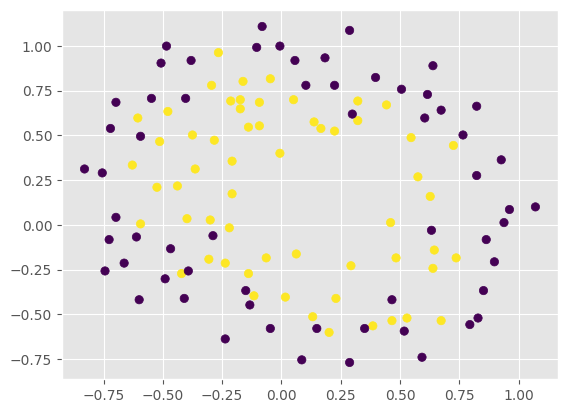

In [13]:
plt.scatter(x[:,0],x[:,1],c=y)

this is not made by me

In [14]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [15]:
x=map_feature(x[:,0],x[:,1])
x.shape

(118, 27)

In [16]:
def sigmoid(z):
  return 1/(1+(np.exp(-z)))

In [17]:
def compute_cost(x,y,w,b,lamda_=1):
  m,n=x.shape
  cost =0
  for i in range(m):
    z=np.dot(x[i],w)+b
    f_wb=sigmoid(z)
    cost+= (-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb))
  cost/=m
  reg_cost=0
  for i in range(n):
    reg_cost+=w[i]**2
  reg_cost*=lamda_/(2*m)
  return cost+reg_cost



In [22]:
np.random.seed(1)
m,n=x.shape
initial_w = np.random.rand(x.shape[1]) - 0.5
initial_b=0.5
cost=compute_cost(x,y,initial_w,initial_b,0.5)
print(cost)

0.6618252552483948


In [25]:
def com_grad(x,y,w,b,lamda_=1):
  m,n=x.shape
  dj_dw=np.zeros(n)
  dj_db=0
  for i in range(m):
    z=np.dot(x[i],w)+b
    f_wb=sigmoid(z)
    err=f_wb-y[i]
    for j in range(n):
      dj_dw[j]+=err*x[i,j]
    dj_db+=err
  dj_dw/=m
  dj_db/=m

  for i in range(n):
    dj_dw[i]+=w[i]*lamda_/m
  return dj_dw,dj_db

In [26]:
dj_dw,dj_db=com_grad(x,y,initial_w,initial_b,0.5)
print(dj_dw[:4],dj_db)

[-0.01038603  0.01140985  0.05362735  0.00314028] 0.07138288792343662


In [28]:
def grad_des(x,y,w,b,lamda_,alpha,it,grad_f,cost_f):
  m,n=x.shape
  j_his=[]
  for i in range(it):
    dj_dw,dj_db=grad_f(x,y,w,b,lamda_)
    w-=alpha*dj_dw
    b-=alpha*dj_db
    j_his.append(cost_f(x,y,w,b,lamda_))
    if i%1000==0:
      print(f'iteration {i:4}: cost {j_his[-1]}')

  return w,b,j_his

In [30]:
initial_b=1
lamda=0.01
it=10000
alpha=0.01
w,b,j_his=grad_des(x,y,initial_w,initial_b,lamda,alpha,it,com_grad,compute_cost)

iteration    0: cost 0.7210188345400221
iteration 1000: cost 0.5874629876860554
iteration 2000: cost 0.5571493267445516
iteration 3000: cost 0.5331852187780525
iteration 4000: cost 0.513669211379471
iteration 5000: cost 0.49746116535166157
iteration 6000: cost 0.4837818783748566
iteration 7000: cost 0.47208058644395257
iteration 8000: cost 0.46195696269215014
iteration 9000: cost 0.45311293975968187


this is not made by me

In [32]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0

    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

In [35]:
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code

    plot_data(X[:, 0:2], y)

    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

        plt.plot(plot_x, plot_y, c="b")

    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)

        # important to transpose z before calling contour
        z = z.T

        # Plot z = 0
        plt.contour(u,v,z, levels = [0.5], colors="g")

<ipython-input-35-1697417b8491>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


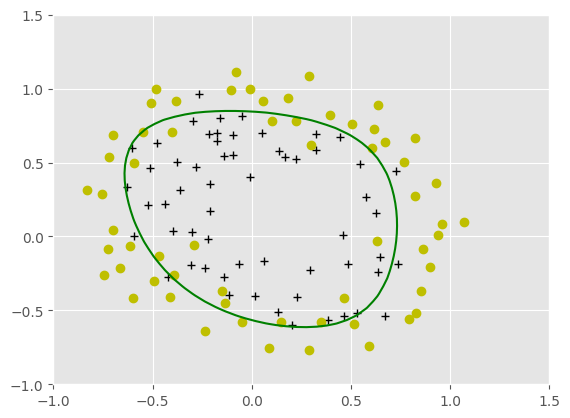

In [36]:
plot_decision_boundary(w, b, x, y)

In [37]:
def predict(x,w,b):
  m,n=x.shape
  z=np.dot(x,w)+b
  f_wb=sigmoid(z)
  p=np.zeros(m)
  for i in range(m):
    if f_wb[i]>=0.5:
      p[i]=1
    else:
      p[i]=0
  return p


In [38]:
p=predict(x,w,b)
print(np.mean(p==y)*100)

82.20338983050848


In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x,y)
y_pred=model.predict(x)
print(model.score(x,y)*100)

83.05084745762711
